# Histogram of fragments

In [1]:
import pandas as pd, numpy as np, geopandas as gp, matplotlib.pyplot as plt


folder = 'HPC_runs/all_basins_unfiltered/'
gdrive = "/Volumes/GoogleDrive/My Drive/Condon_Research_Group/Research_Projects/Rachel/Research/Data/bifurcation_data_repo/" #where shapefiles/csv live 

In [2]:
col_frags = pd.read_csv(gdrive+folder+"Colorado_.csv")

In [3]:
col_frags

,Frag,DamCount,LENGTHKM,Norm_stor,Frag_Index,Hydroseq,DnHydroseq,QC_MA,HUC2,HUC4,HUC8,Norm_stor_up,DamCount_up,LENGTHKM_up,DOR,FragEnd,Frag_dstr,HeadFlag,LENGTHKM_sq
0,6.0,1,464.165,131.026413,1.0,760013519,760013270.0,195.277363,14.0,1402.0,14020001.0,131.026413,1.0,464.165,0.670976,2.0,10.0,1.0,2.154491e+05
1,8.0,1,580.055,189.511867,2.0,760007121,760007075.0,495.424910,14.0,1401.0,14010002.0,825.919706,8.0,1066.009,1.667094,2.0,2508.0,1.0,3.364638e+05
2,9.0,1,257.426,126.275048,3.0,760012360,760012160.0,229.649772,14.0,1401.0,14010004.0,127.281568,5.0,316.002,0.554242,2.0,2508.0,1.0,6.626815e+04
3,10.0,1,4008.467,923.173436,4.0,760006328,760006294.0,1823.623706,14.0,1402.0,14020002.0,1062.372888,17.0,4780.669,0.582561,2.0,11.0,1.0,1.606781e+07
4,11.0,1,548.402,144.551521,5.0,760005946,760005918.0,2074.463442,14.0,1402.0,14020002.0,1208.384849,22.0,5351.722,0.582505,2.0,4503.0,1.0,3.007448e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,53441.0,0,2.167,0.000000,2405.0,760036804,NaN,0.000000,14.0,1401.0,14010001.0,0.117181,1.0,5.336,-1.000000,1.0,NaN,0.0,4.695889e+00
2405,53442.0,0,0.471,0.000000,2406.0,760035628,NaN,0.000000,14.0,1402.0,14020005.0,0.964581,1.0,1.745,-1.000000,1.0,NaN,0.0,2.218410e-01
2406,53443.0,0,0.246,0.000000,2407.0,760027677,NaN,0.295583,14.0,1404.0,14040200.0,0.730220,1.0,14.203,2.470444,1.0,NaN,0.0,6.051600e-02
2407,53444.0,0,1.575,0.000000,2408.0,720019511,NaN,0.368808,15.0,1501.0,15010011.0,0.000000,2.0,42.476,0.000000,1.0,NaN,0.0,2.480625e+00


In [4]:
up_colf = col_frags[col_frags['HUC2'] == 14.0]
up_colf.head(20)

,Frag,DamCount,LENGTHKM,Norm_stor,Frag_Index,Hydroseq,DnHydroseq,QC_MA,HUC2,HUC4,HUC8,Norm_stor_up,DamCount_up,LENGTHKM_up,DOR,FragEnd,Frag_dstr,HeadFlag,LENGTHKM_sq
0,6.0,1,464.165,131.026413,1.0,760013519,760013270.0,195.277363,14.0,1402.0,14020001.0,131.026413,1.0,464.165,0.670976,2.0,10.0,1.0,2.154491e+05
1,8.0,1,580.055,189.511867,2.0,760007121,760007075.0,495.424910,14.0,1401.0,14010002.0,825.919706,8.0,1066.009,1.667094,2.0,2508.0,1.0,3.364638e+05
2,9.0,1,257.426,126.275048,3.0,760012360,760012160.0,229.649772,14.0,1401.0,14010004.0,127.281568,5.0,316.002,0.554242,2.0,2508.0,1.0,6.626815e+04
3,10.0,1,4008.467,923.173436,4.0,760006328,760006294.0,1823.623706,14.0,1402.0,14020002.0,1062.372888,17.0,4780.669,0.582561,2.0,11.0,1.0,1.606781e+07
4,11.0,1,548.402,144.551521,5.0,760005946,760005918.0,2074.463442,14.0,1402.0,14020002.0,1208.384849,22.0,5351.722,0.582505,2.0,4503.0,1.0,3.007448e+05
5,12.0,1,346.595,159.982356,6.0,760013096,760012866.0,362.300250,14.0,1408.0,14080101.0,159.982356,1.0,346.595,0.441574,2.0,31649.0,1.0,1.201281e+05
6,14.0,1,357.916,104.118047,7.0,760013160,760012925.0,225.194602,14.0,1402.0,14020006.0,104.156285,2.0,361.653,0.462517,2.0,4503.0,1.0,1.281039e+05
7,15.0,1,17.786,149.337424,8.0,760038600,760033760.0,1.555604,14.0,1408.0,14080104.0,149.337424,1.0,17.786,95.999666,2.0,2508.0,1.0,3.163418e+02
9,72.0,1,26284.914,4673.532372,10.0,760000882,760000881.0,3399.478698,14.0,1404.0,14040106.0,5046.249323,63.0,28991.543,1.484419,2.0,2508.0,1.0,6.908967e+08
10,74.0,1,258.902,1364.117867,11.0,760013929,760013657.0,71.865849,14.0,1406.0,14060004.0,1364.117867,1.0,258.902,18.981448,2.0,47666.0,1.0,6.703025e+04


Text(0.5, 0, 'Length of fragment (km)')

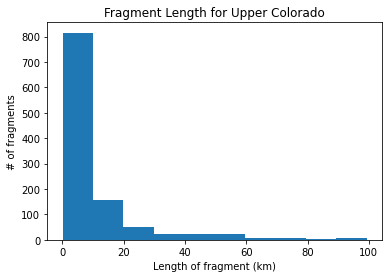

In [18]:
up_col_fil = up_colf[up_colf['LENGTHKM'] < 100]
plt.hist(up_col_fil['LENGTHKM'])
plt.title('Fragment Length for Upper Colorado')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
# plt.xlim(0,25000)
# plt.savefig('.png')

In [19]:
up_colf["LENGTHKM"].mean()

167.86531428571388

In [12]:
up_colf2 = up_colf['LENGTHKM']
print(up_colf2.head)

<bound method NDFrame.head of 0        464.165
1        580.055
2        257.426
3       4008.467
4        548.402
          ...   
2403       2.448
2404       2.167
2405       0.471
2406       0.246
2408       0.773
Name: LENGTHKM, Length: 1155, dtype: float64>


(array([2., 2., 2., 2., 1., 2., 2., 2., 2., 2.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

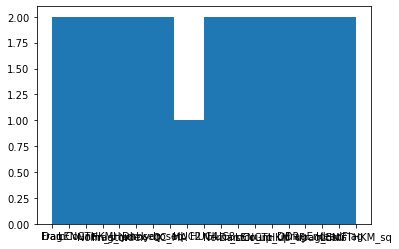

In [7]:
up_colf2
plt.hist(up_colf)

In [20]:
low_colf = col_frags[col_frags['HUC2'] == 15.0]

In [21]:
low_colf["LENGTHKM"].mean()

211.27068421052655

In [2]:
red = gp.read_file(gdrive+folder+'Red_segGeo.shp')

In [3]:
type(red.HUC2[0])
red.columns

Index(['Hydroseq', 'DamID', 'LENGTHKM', 'StreamOrde', 'StartFlag',
       'UpHydroseq', 'DnHydroseq', 'QC_MA', 'HUC2', 'HUC4', 'HUC8',
       'Norm_stor', 'DamCount', 'Norm_stor_', 'DamCount_u', 'LENGTHKM_u',
       'QC_MA_up', 'upstream_c', 'DOR', 'Frag', 'Headwater', 'FragEnd', 'step',
       'Frag_Index', 'dci', 'geometry'],
      dtype='object')

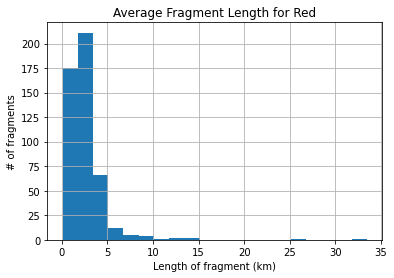

In [4]:
red_frag = red.pivot_table(values=['LENGTHKM'],  index='Frag', aggfunc={'LENGTHKM': (np.mean, len, np.max, np.median)})
red_frag.columns = ["_".join((i,j)) for i,j in red_frag.columns]
red_frag.reset_index()

red_frag['LENGTHKM_mean'].hist(bins=20)
plt.title('Average Fragment Length for Red')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('red_mean.png')

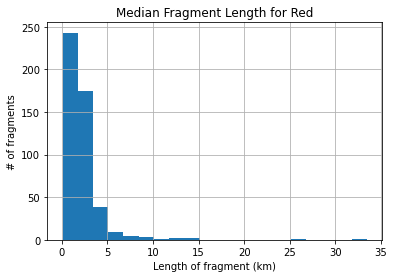

In [5]:
red_frag['LENGTHKM_median'].hist(bins=20)
plt.title('Median Fragment Length for Red')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('red_median.png')

In [6]:
colorado = gp.read_file(gdrive+folder+'Colorado_segGeo.shp')

up_col = colorado[colorado['HUC2'] == 14.0]
# up_col
up_col_frag = up_col.pivot_table(values=['LENGTHKM'],  index='Frag', aggfunc={'LENGTHKM': (np.mean, len, np.max, np.median)})
up_col_frag.columns = ["_".join((i,j)) for i,j in up_col_frag.columns]
up_col_frag.reset_index()

,Frag,LENGTHKM_amax,LENGTHKM_len,LENGTHKM_mean,LENGTHKM_median
0,6.0,11.477,215.0,2.158907,1.9470
1,8.0,11.142,355.0,1.633958,1.2670
2,9.0,18.660,96.0,2.681521,1.5885
3,10.0,26.489,1534.0,2.613081,2.0405
4,11.0,19.142,148.0,3.705419,2.6025
...,...,...,...,...,...
1151,53440.0,2.448,1.0,2.448000,2.4480
1152,53441.0,2.167,1.0,2.167000,2.1670
1153,53442.0,0.401,2.0,0.235500,0.2355
1154,53443.0,0.240,2.0,0.123000,0.1230


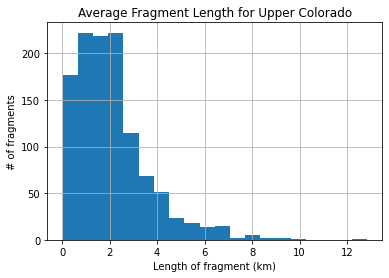

In [7]:
up_col_frag['LENGTHKM_mean'].hist(bins=20)
plt.title('Average Fragment Length for Upper Colorado')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('up_col_mean.png')

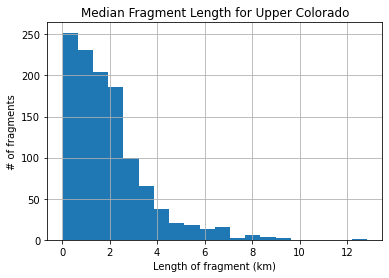

In [8]:
up_col_frag['LENGTHKM_median'].hist(bins=20)
plt.title('Median Fragment Length for Upper Colorado')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('up_col_median.png')

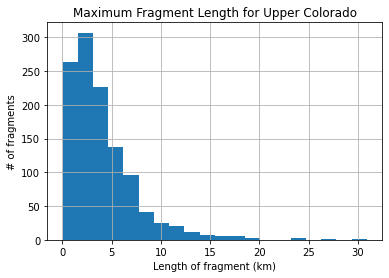

In [9]:
up_col_frag['LENGTHKM_amax'].hist(bins=20)
plt.title('Maximum Fragment Length for Upper Colorado')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('up_col_max.png')

In [10]:
low_col = colorado[colorado['HUC2'] == 15.0]
# low_col
low_col_frag = low_col.pivot_table(values=['LENGTHKM'],  index='Frag', aggfunc={'LENGTHKM': (np.mean, len, np.max, np.median)})
low_col_frag.columns = ["_".join((i,j)) for i,j in low_col_frag.columns]
low_col_frag.reset_index()

,Frag,LENGTHKM_amax,LENGTHKM_len,LENGTHKM_mean,LENGTHKM_median
0,46.0,25.535,30403.0,2.421304,1.994
1,2276.0,6.608,13.0,2.284385,1.649
2,2291.0,9.586,189.0,2.489847,1.755
3,2293.0,4.559,1.0,4.559000,4.559
4,2295.0,1.769,1.0,1.769000,1.769
...,...,...,...,...,...
1249,53435.0,5.275,3.0,3.157333,3.566
1250,53436.0,4.984,5.0,2.987800,3.071
1251,53437.0,1.875,3.0,1.308000,1.838
1252,53439.0,1.087,1.0,1.087000,1.087


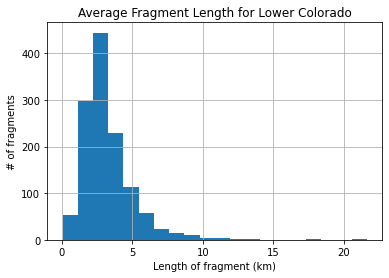

In [11]:
low_col_frag['LENGTHKM_mean'].hist(bins=20)
plt.title('Average Fragment Length for Lower Colorado')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('low_col_average.png')

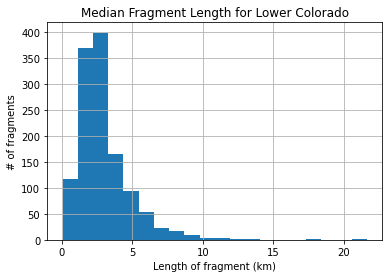

In [12]:
low_col_frag['LENGTHKM_median'].hist(bins=20)
plt.title('Median Fragment Length for Lower Colorado')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('low_col_median.png')

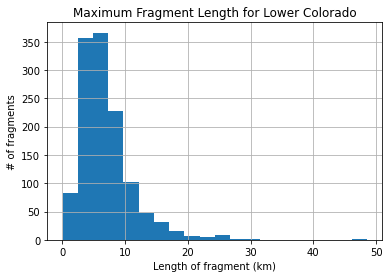

In [13]:
low_col_frag['LENGTHKM_amax'].hist(bins=20)
plt.title('Maximum Fragment Length for Lower Colorado')
plt.ylabel('# of fragments')
plt.xlabel('Length of fragment (km)')
plt.savefig('low_col_max.png')

Index(['LENGTHKM'], dtype='object')

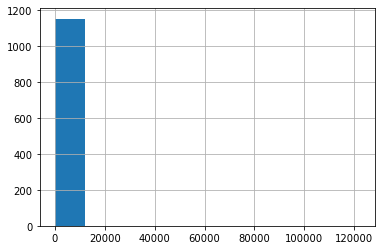

In [14]:
up_col_len = up_col.pivot_table(values=['LENGTHKM'],  index='Frag', aggfunc={'LENGTHKM': (np.sum)})
# up_col_len.columns = ["_".join((i)) for i in up_col_len.columns]
up_col_len.reset_index()
up_col_len['LENGTHKM'].hist()
up_col_len.columns

In [28]:
basin = "miss"
print("---- "+basin+" Output"+" ----"+" \n")

---- miss Output ---- 

